Purpose of the project:

Analyzing the plans of the users of Megaline in order to determine which is the more profitable plan so that the advertising department can adjust the budget according to our analysis.

In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from math import factorial
from nltk.stem import SnowballStemmer 
from scipy import stats as st

In [2]:
calls = pd.read_csv('/datasets/megaline_calls.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messeges = pd.read_csv('/datasets/megaline_messages.csv')

I installed all the libraries in advance because I do not yet know what I will need to use.
I opened all the data sets.

In [3]:
messeges['message_date'] = pd.to_datetime(messeges['message_date'])
messeges.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [4]:
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls['min_charge'] =calls['duration'].apply(np.ceil)
calls.head()

,id,user_id,call_date,duration,min_charge
0,1000_93,1000,2018-12-27,8.52,9.0
1,1000_145,1000,2018-12-27,13.66,14.0
2,1000_247,1000,2018-12-27,14.48,15.0
3,1000_309,1000,2018-12-28,5.76,6.0
4,1000_380,1000,2018-12-30,4.22,5.0


In [5]:
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [6]:
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [7]:
internet['session_date'] = pd.to_datetime(internet['session_date'])
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [8]:
df1 = pd.merge(messeges, calls)
df2 = pd.merge(df1, internet)
df3 = pd.merge(df2, users)

After sampling all the tables I came to the conclusion that I could unify all of them except one table, plans, thus making it more convenient to work.

In [9]:
df3.isnull().sum()

id                  0
user_id             0
message_date        0
call_date           0
duration            0
min_charge          0
session_date        0
mb_used             0
first_name          0
last_name           0
age                 0
city                0
reg_date            0
plan                0
churn_date      35074
dtype: int64

In [10]:
df3['churn_date'] = df3['churn_date'].fillna('Existing Customer')
df3

,id,user_id,message_date,call_date,duration,min_charge,session_date,mb_used,first_name,last_name,age,city,reg_date,plan,churn_date
0,1001_30,1001,2018-12-14,2018-10-17,0.00,0.0,2018-12-27,157.20,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,Existing Customer
1,1001_37,1001,2018-09-06,2018-11-17,15.85,16.0,2018-12-26,694.50,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,Existing Customer
2,1001_44,1001,2018-08-19,2018-12-01,6.13,7.0,2018-09-27,44.91,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,Existing Customer
3,1001_47,1001,2018-12-23,2018-11-08,6.36,7.0,2018-12-07,317.01,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,Existing Customer
4,1001_52,1001,2018-09-20,2018-11-23,0.00,0.0,2018-11-17,409.19,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,Existing Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37883,1496_60,1496,2018-11-19,2018-10-16,8.09,9.0,2018-10-07,0.00,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,Existing Customer
37884,1496_61,1496,2018-09-14,2018-10-15,11.43,12.0,2018-11-28,0.00,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,Existing Customer
37885,1496_62,1496,2018-11-17,2018-11-26,10.01,11.0,2018-12-02,37.26,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,Existing Customer
37886,1496_63,1496,2018-10-18,2018-10-15,8.54,9.0,2018-09-30,163.54,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,Existing Customer


We checked for missing entries and found that they only exist in the churn_date column, and since they indicate existing clients we did not delete them but replaced them with the trial an existing customer.

In [11]:
df3.duplicated().sum()

0

No duplicates found.

In [12]:
df3['duration'].value_counts()

0.00     7482
6.13       41
6.53       38
3.18       36
4.63       35
         ... 
26.00       1
20.00       1
21.95       1
24.63       1
23.81       1
Name: duration, Length: 2455, dtype: int64

In [13]:
df3.drop(df3[df3['duration']== 0.00].index, inplace = True)

In [14]:
df3['duration'].value_counts()

6.13     41
6.53     38
3.18     36
4.63     35
7.21     34
         ..
19.98     1
23.13     1
22.68     1
22.48     1
21.37     1
Name: duration, Length: 2454, dtype: int64

In [15]:
7482 / len(df3)*100

24.606985463395382

In [16]:
df3['mb_used'].value_counts()

0.00      3784
423.06       5
152.13       5
266.25       4
301.31       4
          ... 
435.41       1
152.89       1
307.14       1
127.47       1
876.57       1
Name: mb_used, Length: 23074, dtype: int64

In [17]:
df3.drop(df3[df3['mb_used']== 0.00].index, inplace = True)

In [18]:
df3['mb_used'].value_counts()

152.13    5
423.06    5
308.86    4
373.61    4
437.14    4
         ..
449.22    1
397.38    1
104.27    1
431.46    1
0.75      1
Name: mb_used, Length: 23073, dtype: int64

In [19]:
3784 / len(df3)*100

14.213808128615431

Zero values in columns mb_used and duration were deleted because they do not affect the price and do not contribute to the analysis.

Percentage of deleted values column mb_used - 14.2%.

Percentage of deleted values column duration - 28.1%.

Conclusions and steps so far:

1.Open the data and merge the tables.

2.Replacing the Plan values with numeric values.

3.Search for missing entries - such have been found, but they provide us with information so only rename an existing customer.

4.Duplicate Search - Not Found.

5.Deleting zero values that do not contribute to our analysis (columns).

6.Change dates to a suitable time.

In [20]:
calls['month_call'] = calls['call_date'].dt.strftime('%m')
calls_charg_by_month=pd.pivot_table(calls, index=['user_id', 'month_call'], values= 'min_charge', aggfunc=['count','sum'])
calls_charg_by_month.reset_index(['user_id', 'month_call'], inplace=True)
calls_charg_by_month.columns= ['user_id','month_call', 'min_charge_count', 'min_charge_sum']
calls_charg_by_month=pd.merge(calls_charg_by_month,users[['user_id','plan']],on='user_id', how='left')
calls_charg_by_month

,user_id,month_call,min_charge_count,min_charge_sum,plan
0,1000,12,16,124.0,ultimate
1,1001,08,27,182.0,surf
2,1001,09,49,315.0,surf
3,1001,10,65,393.0,surf
4,1001,11,64,426.0,surf
...,...,...,...,...,...
2253,1498,12,39,339.0,surf
2254,1499,09,41,346.0,surf
2255,1499,10,53,385.0,surf
2256,1499,11,45,308.0,surf


Total calls and minutes per user.

In [21]:
messeges['month_mes'] = messeges['message_date'].dt.strftime('%m')
messeges_charg_by_month=pd.pivot_table(messeges, index=['user_id', 'month_mes'], values= 'id', aggfunc='count')
messeges_charg_by_month.reset_index(['user_id', 'month_mes'], inplace=True)
messeges_charg_by_month.columns= ['user_id','month_mes', 'mes_count']
messeges_charg_by_month=pd.merge(messeges_charg_by_month,users[['user_id','plan']],on='user_id', how='left')
messeges_charg_by_month

,user_id,month_mes,mes_count,plan
0,1000,12,11,ultimate
1,1001,08,30,surf
2,1001,09,44,surf
3,1001,10,53,surf
4,1001,11,36,surf
...,...,...,...,...
1801,1496,09,21,surf
1802,1496,10,18,surf
1803,1496,11,13,surf
1804,1496,12,11,surf


The number of messages each user sent per month.

In [34]:
internet['month_gb'] = internet['session_date'].dt.strftime('%m')
internet_charg_by_month=pd.pivot_table(internet, index=['user_id', 'month_gb'], values= 'mb_used', aggfunc='sum')
internet_charg_by_month.reset_index(['user_id', 'month_gb'], inplace=True)
internet_charg_by_month.columns= ['user_id','month_gb', 'gb_sum']
internet_charg_by_month=pd.merge(internet_charg_by_month,users[['user_id','plan']],on='user_id', how='left')
internet_charg_by_month['gb_charged'] =internet_charg_by_month['gb_sum']*0.0009765625
internet_charg_by_month['gb_charged'] =internet_charg_by_month['gb_charged'].apply(np.ceil)
internet_charg_by_month

,user_id,month_gb,gb_sum,plan,gb_charged
0,1000,12,1901.47,ultimate,2.0
1,1001,08,6919.15,surf,7.0
2,1001,09,13314.82,surf,14.0
3,1001,10,22330.49,surf,22.0
4,1001,11,18504.30,surf,19.0
...,...,...,...,...,...
2272,1498,12,23137.69,surf,23.0
2273,1499,09,12984.76,surf,13.0
2274,1499,10,19492.43,surf,20.0
2275,1499,11,16813.83,surf,17.0


i fixed this.

Monthly volume of data per user.

In [23]:
df4=pd.merge(calls_charg_by_month[['user_id','min_charge_sum']],internet_charg_by_month[['user_id','gb_charged']],on='user_id', how='left')
df6=pd.merge(df4,users[['user_id','city', 'plan']],on='user_id', how='left')
cal_ind_month_charge_t = pd.merge(df6,messeges_charg_by_month)
cal_ind_month_charge_t.isnull().sum()

user_id            0
min_charge_sum     0
gb_charged        64
city               0
plan               0
month_mes          0
mes_count          0
dtype: int64

In [24]:
cal_ind_month_charge_t.isnull().sum()/len(cal_ind_month_charge_t)*100

user_id           0.000000
min_charge_sum    0.000000
gb_charged        0.075468
city              0.000000
plan              0.000000
month_mes         0.000000
mes_count         0.000000
dtype: float64

In [25]:
cal_ind_month_charge_t.dropna(inplace=True)
cal_ind_month_charge_t.isnull().sum()

user_id           0
min_charge_sum    0
gb_charged        0
city              0
plan              0
month_mes         0
mes_count         0
dtype: int64

Missing entries were created during the merge of the tables (apparently some users do not have all the information on them).
The information is deleted because it is minor (7.5%) and cannot be analyzed.

The above three tables are consolidated.

In [26]:
def cal_ind_month_charge(row):
    min_u=row['min_charge_sum']
    mes_u=row['mes_count']
    gb_u=row['gb_charged']
    if row['plan']=='ultimate':
        min_limit=3000
        message_limit=1000
        gb_limit=30
        monthly_rate=70
        over_min_rate=0.01
        over_message_rate=0.01
        over_gb_rate=7
    else:
        min_limit=500
        message_limit=50
        gb_limit=15
        monthly_rate=20
        over_min_rate=0.03
        over_message_rate=0.03
        over_gb_rate=10
    if min_u<=min_limit:
        over_min=0
    else:
        over_min=min_u-min_limit
    if mes_u<=message_limit:
        over_message=0
    else:
        over_message=mes_u-message_limit
    if gb_u<=gb_limit:
        over_gb=0
    else:
        over_gb=gb_u-gb_limit
        
    total_charge= monthly_rate+over_min*over_min_rate+over_message*over_message_rate+over_gb*over_gb_rate
    return total_charge

In [27]:
cal_ind_month_charge_t['month_charge']=cal_ind_month_charge_t.apply(cal_ind_month_charge, axis=1)
cal_ind_month_charge_t.sort_values("month_mes")

,user_id,min_charge_sum,gb_charged,city,plan,month_mes,mes_count,month_charge
40560,1214,384.0,23.0,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,01,2,70.00
40272,1214,516.0,23.0,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,01,2,70.00
11132,1077,290.0,19.0,"Charlotte-Concord-Gastonia, NC-SC MSA",ultimate,01,37,70.00
40260,1214,516.0,2.0,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,01,2,70.00
36086,1196,563.0,25.0,"Los Angeles-Long Beach-Anaheim, CA MSA",ultimate,01,23,70.00
...,...,...,...,...,...,...,...,...
49817,1261,513.0,22.0,"Kansas City, MO-KS MSA",surf,12,50,90.39
49806,1261,513.0,23.0,"Kansas City, MO-KS MSA",surf,12,50,100.39
49795,1261,513.0,19.0,"Kansas City, MO-KS MSA",surf,12,50,60.39
49971,1261,479.0,18.0,"Kansas City, MO-KS MSA",surf,12,50,50.00


Each user's monthly billing.

Steps taken at this stage:

Step A - for each of the three tables:

1.I added a column with the given month only.

2.I made a pivot table that calculates for us the desired value.

3.I merged the pivot table with the user table.

4.I combined the three tables into one table that contains all the relevant data.

Step B I wrote a function that calculates the monthly income from each user.

Step C - I ran the function on the consolidated table and added a column of the monthly income from each user.

As we suspected, the missing values ​​generated in the monthly cost calculation are from only one plan so the best way in our opinion is to replace the missing values ​​in the monthly internet average so that the data remains as reliable as possible.

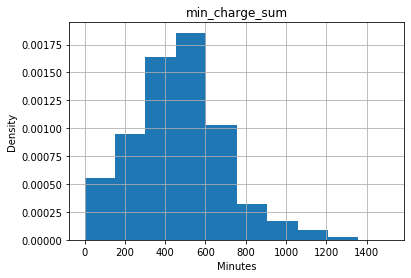

Surf minutes mean: 466.87026656592104 Surf minutes variance: 52870.937622837446 Surf minutes standard diviasion: 229.93681223944427
Most minutes are in this range: 0 : 1156.680703284254



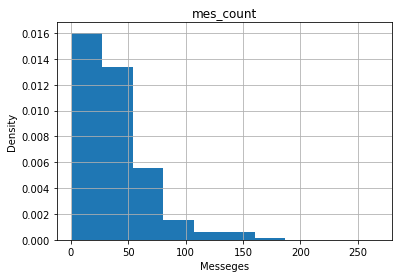

Surf message mean: 37.52540020031981 Surf message variance: 899.0154199513336 Surf message standard diviasion: 29.983585842112575
Most messages are in this range: 0 : 127.47615772665753



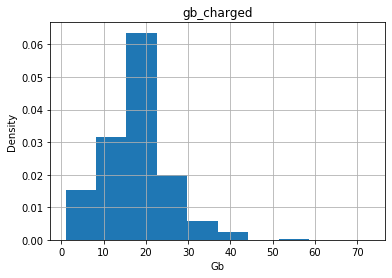

Surf data mean: 17.775852677080955 Surf data variance: 54.68261218346561 Surf data standard diviasion: 7.394769244774688
Most data are in this range: 0 : 39.96016041140502


In [64]:
dsurf = cal_ind_month_charge_t.query('plan == "surf"')
dsurf = pd.DataFrame(dsurf)
dsurf_min_mean = dsurf['min_charge_sum'].mean()
dsurf_min_var = np.var(dsurf['min_charge_sum'])
dsurf_min_std = np.sqrt(dsurf_min_var)
dsurf.hist('min_charge_sum', density = True)
plt.xlabel('Minutes')
plt.ylabel('Density')
plt.show()
print('Surf minutes mean:', dsurf_min_mean,
      'Surf minutes variance:', dsurf_min_var,
      'Surf minutes standard diviasion:', dsurf_min_std)
if (dsurf_min_mean - 3*dsurf_min_std) < [0]:
    print ('Most minutes are in this range:', 0 ,':', (dsurf_min_mean + 3*dsurf_min_std))
else:
    print('Most minutes are in this range:', (dsurf_min_mean - 3*dsurf_min_std),':', (dsurf_min_mean + 3*dsurf_min_std))
print()


dsurf_mes_mean = dsurf['mes_count'].mean()
dsurf_mes_var = np.var(dsurf['mes_count'])
dsurf_mes_std = np.sqrt(dsurf_mes_var)
dsurf.hist('mes_count', density = True)
plt.xlabel('Messeges')
plt.ylabel('Density')
plt.show()
print('Surf message mean:', dsurf_mes_mean,
      'Surf message variance:', dsurf_mes_var,
      'Surf message standard diviasion:', dsurf_mes_std)
if (dsurf_mes_mean - 3*dsurf_mes_std) < [0]:
    print ('Most messages are in this range:', 0 ,':', (dsurf_mes_mean + 3*dsurf_mes_std))
else:
    print('Most messages are in this range:', (dsurf_mes_mean - 3*dsurf_mes_std),':', (dsurf_mes_mean + 3*dsurf_mes_std))
print()

dsurf_gb_mean = dsurf['gb_charged'].mean()
dsurf_gb_var = np.var(dsurf['gb_charged'])
dsurf_gb_std = np.sqrt(dsurf_gb_var)
dsurf.hist('gb_charged', density = True)
plt.xlabel('Gb')
plt.ylabel('Density')
plt.show()
print('Surf data mean:', dsurf_gb_mean,
      'Surf data variance:', dsurf_gb_var,
      'Surf data standard diviasion:', dsurf_gb_std)
if dsurf_gb_mean - 3*dsurf_gb_std < [0]:
    print ('Most data are in this range:', 0 ,':', (dsurf_gb_mean + 3*dsurf_gb_std))
else:
    print('Most data are in this range:', (dsurf_min_mean - 3*dsurf_min_std),':', (dsurf_min_mean + 3*dsurf_min_std))

The calculation has been corrected.

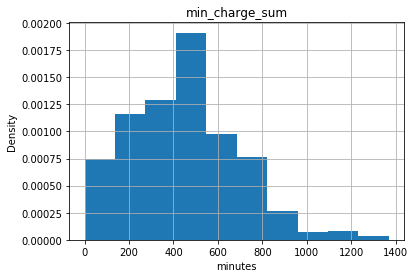

Ultimate minutes  mean: 444.87729510258345 Ultimate minutes variance: 59500.63612384662 Ultimate minutes standard diviasion: 243.92752227628316
Most minutes are in this range: 0 : 1176.659861931433



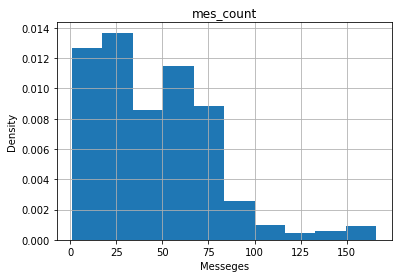

Ultimate message mean: 45.73705580108512 Ultimate message variance: 989.1234154127535 Ultimate message standard diviasion: 31.45033251672792
Most messages are in this range: 0 : 140.08805335126888



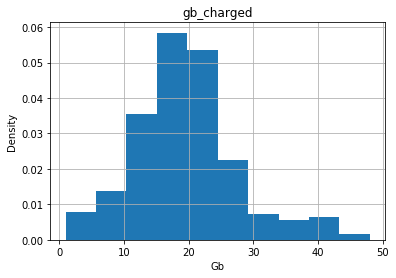

Ultimate data mean: 19.555926844166578 Ultimate data variance: 63.947781246345976 Ultimate data standard diviasion: 7.996735661902672
Most data are in this range: 0 : 43.54613382987459


In [63]:
dultimate = cal_ind_month_charge_t.query('plan=="ultimate"')
dultimate = pd.DataFrame(dultimate)

dultimate_min_mean = dultimate['min_charge_sum'].mean()
dultimate_min_var = np.var(dultimate['min_charge_sum'])
dultimate_min_std = np.sqrt(dultimate_min_var)
dultimate.hist('min_charge_sum', density = True)
plt.xlabel('minutes')
plt.ylabel('Density')
plt.show()
print('Ultimate minutes  mean:', dultimate_min_mean,
      'Ultimate minutes variance:', dultimate_min_var,
      'Ultimate minutes standard diviasion:', dultimate_min_std)
if (dultimate_min_mean - 3*dultimate_min_std) < [0]:
    print ('Most minutes are in this range:', 0 ,':', (dultimate_min_mean + 3*dultimate_min_std))
else:
    print('Most minutes are in this range:', (dultimate_min_mean - 3*dultimate_min_std),':', (dultimate_min_mean + 3*dultimate_min_std))
print()

dultimate_mes_mean = dultimate['mes_count'].mean()
dultimate_mes_var = np.var(dultimate['mes_count'])
dultimate_mes_std = np.sqrt(dultimate_mes_var)
dultimate.hist('mes_count', density = True)
plt.xlabel('Messeges')
plt.ylabel('Density')
plt.show()
print('Ultimate message mean:', dultimate_mes_mean,
      'Ultimate message variance:', dultimate_mes_var,
      'Ultimate message standard diviasion:', dultimate_mes_std)
if (dultimate_mes_mean - 3*dultimate_mes_std) < [0]:
    print ('Most messages are in this range:', 0 ,':', (dultimate_mes_mean + 3*dultimate_mes_std))
else:
    print('Most messages are in this range:', (dultimate_mes_mean - 3*dultimate_mes_std),':', (dultimate_mes_mean + 3*dultimate_mes_std))
print()
dultimate_gb_mean = dultimate['gb_charged'].mean()
dultimate_gb_var = np.var(dultimate['gb_charged'])
dultimate_gb_std = np.sqrt(dultimate_gb_var)
dultimate.hist('gb_charged', density = True)
plt.xlabel('Gb')
plt.ylabel('Density')
plt.show()
print('Ultimate data mean:', dultimate_gb_mean,
      'Ultimate data variance:', dultimate_gb_var,
      'Ultimate data standard diviasion:', dultimate_gb_std)
if dultimate_gb_mean - 3*dultimate_gb_std < [0]:
    print ('Most data are in this range:', 0 ,':', (dultimate_gb_mean + 3*dultimate_gb_std))
else:
    print('Most data are in this range:', (dultimate_min_mean - 3*dultimate_min_std),':', (dultimate_min_mean + 3*dultimate_min_std))

The calculation has been corrected.

Steps taken at this point:

1.We divided the data into two parts according to plan type.

2.For each relevant column in the table we calculated: mean, variance and standard deviation.

3.We created a histogram for each relevant column showing the data distribution.

4.We have calculated the normal range in which most of the data are.

Conclusions from this stage:

1.Surf program users consume on average more call minutes than Ultimate program users.

2.Ultimate program users send more messages on average than Surf program users.

3.Ultimate program users consume more Internet on average than Surf program users.

In [30]:
g1 = dsurf['month_charge']
g2 = dultimate['month_charge']
st.levene(g1, g2, center ='mean')

LeveneResult(statistic=21407.855164368008, pvalue=0.0)

Test to make sure that the variance of the samples is indeed different.

In [31]:
alfa = 0.05

result = st.ttest_ind( 
         dsurf['month_charge'], dultimate['month_charge'], equal_var = False)
print('p-value', result.pvalue)

if (result.pvalue<alfa):
    print('we reject the null hypothesis')
else:
    print('we can not reject the null hypothesis')    
    
surf_mean =dsurf['month_charge'].mean()
ultimate_mean = dultimate['month_charge'].mean()
print('mean income surf users:', surf_mean)
print('mean income ultimate users:', ultimate_mean)

p-value 3.0070360659169144e-241
we reject the null hypothesis
mean income surf users: 66.18038254054719
mean income ultimate users: 74.4330063598146


my null hypothesis was that the average income from the two programs is equal to each other (or rather almost equal to 95%) in its average and distribution (hence the alpha value was also chosen to be 5%).
In the first test we checked if their differences are the same (to know what to note in the second test), and we got a negative result.
In the second test, we examined whether the p value of the two revenues is greater than the alpha, and after receiving a negative answer, we rejected the claim.

In [32]:
ny_nj_users = cal_ind_month_charge_t.query('city=="New York-Newark-Jersey City, NY-NJ-PA MSA"')
others_users = cal_ind_month_charge_t.query('city!="New York-Newark-Jersey City, NY-NJ-PA MSA"')
st.levene(ny_nj_users['month_charge'], others_users['month_charge'], center ='mean')

LeveneResult(statistic=17.397739776026725, pvalue=3.034876606110965e-05)

Test to make sure that the variance of the samples is indeed different.

In [33]:
alfa = 0.05

result2 = st.ttest_ind( 
         ny_nj_users['month_charge'], others_users['month_charge'], equal_var = False)
print('p-value', result.pvalue)

if (result2.pvalue<alfa):
    print('we reject the null hypothesis')
else:
    print('we can not reject the null hypothesis')    
    
ny_nj_users_mean =ny_nj_users['month_charge'].mean()
others_users_mean = dultimate['month_charge'].mean()
print('mean income surf users:', ny_nj_users_mean)
print('mean income ultimate users:', others_users_mean)

p-value 3.0070360659169144e-241
we reject the null hypothesis
mean income surf users: 61.51864232008594
mean income ultimate users: 74.4330063598146


My null hypothesis was that the average income from New York and New Jersey users was equal to the income of the rest of the users (or rather almost equal to 95%) in its average and its distribution (hence the alpha value was also chosen to be 5%).
In the first test we checked if the differences between them are the same (to know what to pay attention to in the second test), and we got a negative result.
In the second test we checked whether the p value of the two revenues is greater than the alpha and after we got a negative answer we rejected the claim.

Final conclusion and steps taken in the project:

Steps:

1.Installing all the libraries, loading the data and changing the times in the data to dates that can be worked with.

2.Merge all the tables into one table (except the plan table).

3.Check for missing values - found in the 'churn_date' column and because their cause is known, the values have been changed to a value that can be worked with.

4.Duplicate check - not found.

5.Delete zero values ​​in the 'duration' and 'mb_used' columns (because they have no value for calculating income if they are zero).

6.Add a column of dates in the original data for months only numerically.

7.Add a column of monthly consumption in each parameter.

8.Merge all the tables into a large table that contains all the relevant data.

9.Write a function that adds a column that indicates the monthly income from each user.

10.Check for missing values in the new table - found and deleted (minor percentage of data).

11.Dividing the data according to plan.

12.Create histograms and statistics for each group.

13.Testing the hypotheses.

Conclusions:

1.Surf program users consume on average more call minutes than Ultimate program users.

2.Ultimate program users send more messages on average than surf program users.

3.Ultimate program users consume more internet on average than surf program users.

4.An ultimate plan makes more money than a surfing plan.
 
5.The hypothesis that the two programs are similar in terms of average income and distribution is incorrect.

6.The hypothesis that the income from New York and New Jersey residents is equal on average and distributed to other users is incorrect.

- [ ] The purpose of the project
- [ ] Gb calculations
- [ ] Negative data range